In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join, expanduser

In [4]:
src_dir = join(expanduser('~'), '.alembic/neuroglancer/pinky100_v0/father_of_alignment_v4/stats')

In [192]:
def parse_fn(fn):
    split = fn.split(', ')
    return split[0][1:], split[1][:-1]

In [155]:
stacks = []
files = os.listdir(src_dir)
files.sort()
for fn in files:
    df = pd.read_csv(join(src_dir, fn), index_col=0)
    src, dst = parse_fn(fn)
    df['name'] = fn
    df['src'] = src
    df['dst'] = dst
    stacks.append(df.stack())
d = pd.concat(stacks, axis=1).transpose()
d = d.set_index(('xcorr_r_max', 'name'))
d.index.rename('name', inplace=True)

In [183]:
d.index[d['xcorr_delta_15']['accepted'] < 5]

Index(['(100, 101)', '(100, 102)', '(101, 102)', '(1023, 1024)',
       '(1023, 1025)', '(1024, 1025)', '(1024, 1026)', '(1025, 1026)',
       '(1026, 1028)', '(1028, 1030)',
       ...
       '(929, 930)', '(95, 96)', '(96, 97)', '(96, 98)', '(965, 967)',
       '(97, 99)', '(98, 100)', '(98, 99)', '(99, 100)', '(99, 101)'],
      dtype='object', name='name', length=235)

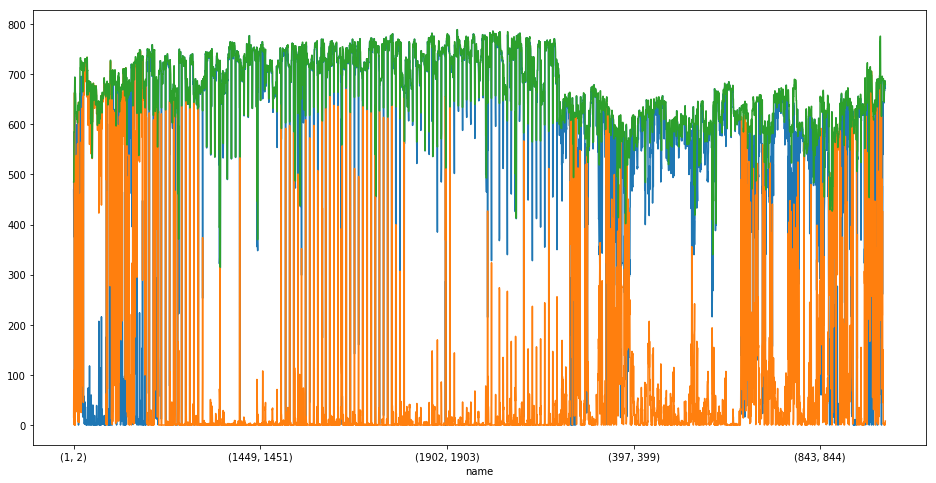

In [186]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['accepted'].plot()
d['xcorr_delta_15']['rejects'].plot()
(d['xcorr_delta_15']['accepted'] + d['xcorr_delta_15']['rejects']).plot()
plt.show()

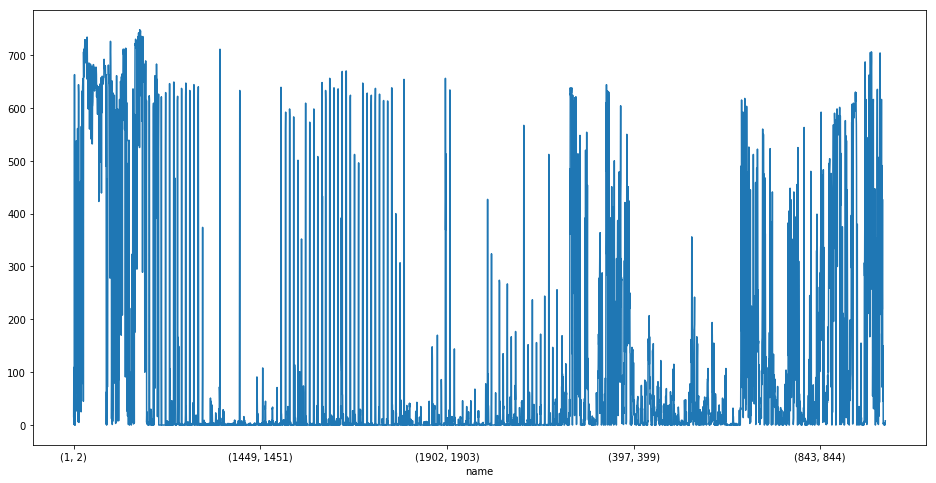

In [184]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['rejects'].plot()
plt.show()

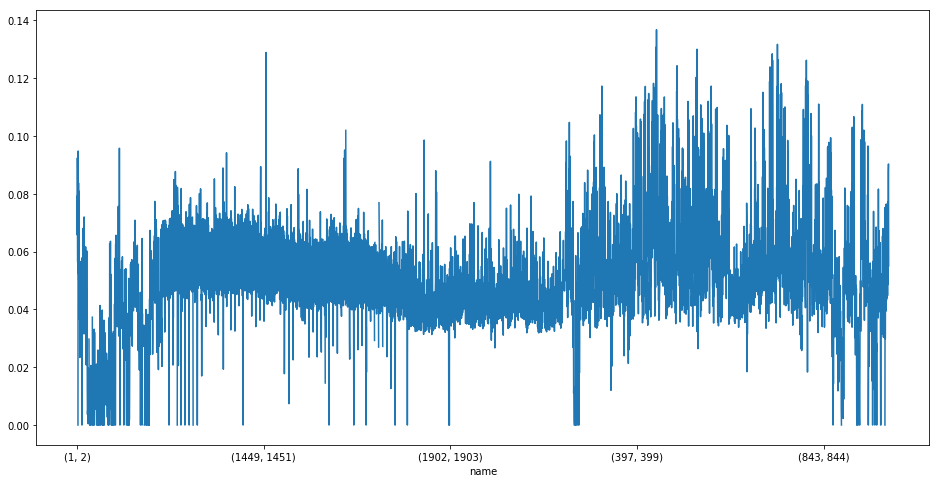

In [181]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['std'].plot()
# d['xcorr_delta_15']['std'][d['xcorr_delta_15']['accepted'] > 0].plot()
plt.show()